Este projeto tem como objetivo utilizar de diferentes técnicas de machine learning para prever quantos gols o artilheiro do campeonato brasileiro fará. Primeiramente extrai-se os dados por meio do web scrappig, em seguida os dados são limpados e finalmente as técnicas de predição são aplicadas.

$\textbf{Web Scrapping}$

In [1]:
import requests

In [2]:
# URL do website em que faremos o scrapping
url = "https://pt.wikipedia.org/wiki/Lista_de_artilheiros_do_Campeonato_Brasileiro_de_Futebol#Por_edi%C3%A7%C3%A3o"

In [3]:
# Importando a página
data = requests.get(url)

In [4]:
data

<Response [200]>

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(data.text, 'html.parser')

In [7]:
tables = soup.find_all('table')

In [8]:
tabela = tables[2]

$\textbf{Data Cleaning}$

In [10]:
import pandas as pd

In [11]:
artilheiros = pd.read_html(str(tabela))[0]

In [12]:
artilheiros

,Edição,Jogador,Nacionalidade,Clube,Gols,Jogos,Média,Ref.
0,1959,Léo Briglia,Brasil,Bahia§,8,14,0.57,[8]
1,1960,Bececê,Brasil,Fortaleza,8,10,0.80,[9]
2,1961,Pelé,Brasil,Santos§,7,10,0.70,[10]
3,1962,Coutinho,Brasil,Santos§,7,5,1.40,[11]
4,1963,Ruiter,Brasil,Confiança,9,3,3.00,[12]
...,...,...,...,...,...,...,...,...
75,2019,Gabigol (2),Brasil,Flamengo§,25,29,0.86,[81]
76,2020,Luciano,Brasil,São Paulo,18,32,0.56,[82]
77,2020,Claudinho,Brasil,Red Bull Bragantino,18,35,0.51,[83]
78,2021,Hulk,Brasil,Atlético Mineiro§,19,35,0.54,[84][85]


In [13]:
artilheiros.dtypes

Edição           object
Jogador          object
Nacionalidade    object
Clube            object
Gols             object
Jogos            object
Média            object
Ref.             object
dtype: object

In [14]:
artilheiros.head(15)

,Edição,Jogador,Nacionalidade,Clube,Gols,Jogos,Média,Ref.
0,1959,Léo Briglia,Brasil,Bahia§,8,14,0.57,[8]
1,1960,Bececê,Brasil,Fortaleza,8,10,0.80,[9]
2,1961,Pelé,Brasil,Santos§,7,10,0.70,[10]
3,1962,Coutinho,Brasil,Santos§,7,5,1.40,[11]
4,1963,Ruiter,Brasil,Confiança,9,3,3.00,[12]
5,1964,Pelé (2),Brasil,Santos§,7,6,1.17,[10]
6,1965,Bita,Brasil,Náutico,9,9,1.00,[9][13]
7,1966,Toninho Guerreiro,Brasil,Santos,10,5,2.00,[10]
8,1966,Bita (2),Brasil,Náutico,10,8,1.25,[14]
9,TB - 1967,Chicletes,Brasil,Treze,9,10,0.90,[15]


In [15]:
artilheiros['Gols'].describe()

count     80
unique    23
top       21
freq       9
Name: Gols, dtype: object

In [16]:
artilheiros.loc[53, 'Gols'] = 34

In [17]:
artilheiros['Gols'] = artilheiros['Gols'].astype(int)

In [18]:
artilheiros.loc[9, 'Edição'] = artilheiros.loc[9, 'Edição'].replace('TB - ', '')
artilheiros.loc[10, 'Edição'] = artilheiros.loc[10, 'Edição'].replace('RGP - ', '')
artilheiros.loc[11, 'Edição'] = artilheiros.loc[11, 'Edição'].replace('RGP - ', '')
artilheiros.loc[12, 'Edição'] = artilheiros.loc[12, 'Edição'].replace('TB - ', '')
artilheiros.loc[13, 'Edição'] = artilheiros.loc[13, 'Edição'].replace('RGP - ', '')

In [19]:
artilheiros['Edição'].astype(int)

0     1959
1     1960
2     1961
3     1962
4     1963
      ... 
75    2019
76    2020
77    2020
78    2021
79    2022
Name: Edição, Length: 80, dtype: int32

In [20]:
artilheiros.head(15)

,Edição,Jogador,Nacionalidade,Clube,Gols,Jogos,Média,Ref.
0,1959,Léo Briglia,Brasil,Bahia§,8,14,0.57,[8]
1,1960,Bececê,Brasil,Fortaleza,8,10,0.80,[9]
2,1961,Pelé,Brasil,Santos§,7,10,0.70,[10]
3,1962,Coutinho,Brasil,Santos§,7,5,1.40,[11]
4,1963,Ruiter,Brasil,Confiança,9,3,3.00,[12]
5,1964,Pelé (2),Brasil,Santos§,7,6,1.17,[10]
6,1965,Bita,Brasil,Náutico,9,9,1.00,[9][13]
7,1966,Toninho Guerreiro,Brasil,Santos,10,5,2.00,[10]
8,1966,Bita (2),Brasil,Náutico,10,8,1.25,[14]
9,1967,Chicletes,Brasil,Treze,9,10,0.90,[15]


In [21]:
artilheiros['Edição'].shape

(80,)

Vemos que em algumas edições do campeonato, houve mais de um artilheiro. Em alguns casos, como nos anos de 1967 e 1968, houve dois artilheiros com diferentes números de gols. Isso se deve ao fato de que o campeonato brasileiro seguia uma estrutura diferente da utilizada nos dias de hoje. Para contornar esse problema, selecionou-se o artilheiro com maior número de gols para cada edição.

In [22]:
artilheiros['Edição'] = artilheiros['Edição'].drop_duplicates(keep='last')

In [23]:
artilheiros = artilheiros.dropna(axis=0)

In [24]:
artilheiros['Edição'] = artilheiros['Edição'].astype(int)

<ipython-input-24-e923041a46bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artilheiros['Edição'] = artilheiros['Edição'].astype(int)


In [25]:
artilheiros.loc[48, 'Edição']
artilheiros = artilheiros.drop(48)

In [26]:
artilheiros['Média'] = artilheiros['Média'].astype(float)
artilheiros['Jogos'] = artilheiros['Jogos'].astype(int)

$\textbf{Vizualização dos dados}$

In [27]:
artilheiros.corr()['Gols'].sort_values(ascending=False)

Gols      1.000000
Jogos     0.715807
Edição    0.572687
Média    -0.109147
Name: Gols, dtype: float64

In [28]:
import matplotlib.pyplot as plt

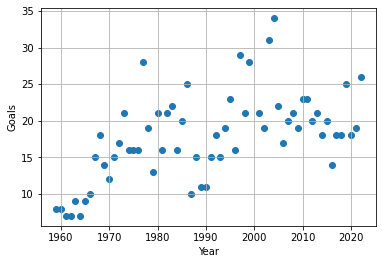

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(artilheiros['Edição'], artilheiros['Gols'])
plt.xlabel('Year')
plt.ylabel('Goals')
plt.grid()
plt.figure(facecolor='white')
plt.show()
plt.savefig('gols.png')

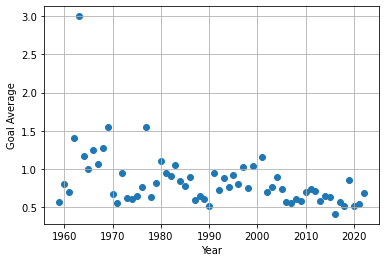

In [30]:
plt.scatter(artilheiros['Edição'], artilheiros['Média'])
plt.xlabel('Year')
plt.ylabel('Goal Average')
plt.grid()
plt.show()

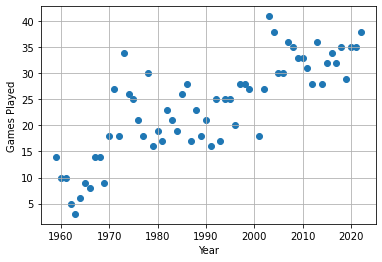

In [31]:
plt.scatter(artilheiros['Edição'], artilheiros['Jogos'])
plt.xlabel('Year')
plt.ylabel('Games Played')
plt.grid()
plt.show()

$\textbf{Machine Learning Models}$

Utilizaremos modelos de predição, uma vez que o objetivo do projeto é prever quantos gols os artilheiros do campeonato brasileiro marcarão, e comparar as predições com os valores reais.

In [32]:
artilheiros.head()

,Edição,Jogador,Nacionalidade,Clube,Gols,Jogos,Média,Ref.
0,1959,Léo Briglia,Brasil,Bahia§,8,14,0.57,[8]
1,1960,Bececê,Brasil,Fortaleza,8,10,0.80,[9]
2,1961,Pelé,Brasil,Santos§,7,10,0.70,[10]
3,1962,Coutinho,Brasil,Santos§,7,5,1.40,[11]
4,1963,Ruiter,Brasil,Confiança,9,3,3.00,[12]


In [33]:
df = artilheiros[['Edição', 'Gols', 'Jogos', 'Média']]
df.head()

,Edição,Gols,Jogos,Média
0,1959,8,14,0.57
1,1960,8,10,0.80
2,1961,7,10,0.70
3,1962,7,5,1.40
4,1963,9,3,3.00


In [34]:
df.shape

(63, 4)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [36]:
features = ['Edição', 'Jogos', 'Média']
target = 'Gols'

all_X = df[features]
all_y = df[target]

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2, random_state=42)

In [37]:
import numpy as np

In [38]:
# Instantiating the models
linreg = LinearRegression()
lr = LogisticRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

# Fitting the models
linreg.fit(train_X, train_y)
lr.fit(train_X, train_y)
knn.fit(train_X, train_y)
rf.fit(train_X, train_y)

# Predicting 
pred_linreg = linreg.predict(test_X)
pred_lr = lr.predict(test_X)
pred_knn = knn.predict(test_X)
pred_rf = rf.predict(test_X)

# Calculating the RMSE for each model

mse_linreg = mean_squared_error(test_y, pred_linreg)
rmse_linreg = np.sqrt(mse_linreg)

mse_lr = mean_squared_error(test_y, pred_lr)
rmse_lr = np.sqrt(mse_lr)

mse_knn = mean_squared_error(test_y, pred_knn)
rmse_knn = np.sqrt(mse_knn)

mse_rf = mean_squared_error(test_y, pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(rmse_linreg)
print(rmse_lr)
print(rmse_knn)
print(rmse_rf)

3.3109400033872824
4.009603855360661
3.541837854083016
2.175826986900171


C:\Users\igorc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Vemos que o modelo de Random Forest obteve o menor valor de RMSE, de aproximadamente 2.4 gols.

$\textbf{Creating a dataframe to visualize the RMSEs}$

In [39]:
d = {'RMSE': [rmse_linreg, rmse_lr, rmse_knn, rmse_rf]}

data = pd.DataFrame(data=d, index=['Linear Regression', 'Logistic Regression', 'KNeighbors', 'Random Forest'])
data.sort_values(by = 'RMSE', ascending=True)

,RMSE
Random Forest,2.175827
Linear Regression,3.310940
KNeighbors,3.541838
Logistic Regression,4.009604


In [40]:
import dataframe_image as dfi

In [41]:
dfi.export(data, 'dataframe.png')